# Import the Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Import the Data

In [2]:
df = pd.read_csv('Sample - Superstore.csv', encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Data Exploration

In [3]:
# Shape of the original data

print("number of Rows:", df.shape[0])
print("number of Columns:", df.shape[1])

number of Rows: 9994
number of Columns: 21


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

As we see, we don't have null values

In [5]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
# Drop not useful columns

droped_columns = ['Row ID','Customer Name']
new_df = df.drop(droped_columns, axis = 1)

In [7]:
# Counts evrry category in each column

categorical_columns = ['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category']
for col in categorical_columns:
    print(f'Distribution of {col}:')
    print(new_df[col].value_counts())
    print('\n')

Distribution of Ship Mode:
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64


Distribution of Segment:
Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64


Distribution of Country:
United States    9994
Name: Country, dtype: int64


Distribution of City:
New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: City, Length: 531, dtype: int64


Distribution of State:
California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224


In [8]:
# Relationship between Sales and Profit

df[['Sales', 'Profit']].describe()

,Sales,Profit
count,9994.000000,9994.000000
mean,229.858001,28.656896
std,623.245101,234.260108
min,0.444000,-6599.978000
25%,17.280000,1.728750
50%,54.490000,8.666500
75%,209.940000,29.364000
max,22638.480000,8399.976000


In [9]:
# Group by Category and summarize Sales and Profit

category_summary = new_df.groupby('Category')[['Sales', 'Profit']].sum()
category_summary

,Sales,Profit
Category,,
Furniture,741999.7953,18451.2728
Office Supplies,719047.0320,122490.8008
Technology,836154.0330,145454.9481


In [10]:
# Group by Region and summarize Sales and Profit

region_summary = new_df.groupby('Region')[['Sales', 'Profit']].sum()
region_summary

,Sales,Profit
Region,,
Central,501239.8908,39706.3625
East,678781.2400,91522.7800
South,391721.9050,46749.4303
West,725457.8245,108418.4489


In [11]:
# Group by Ship Mode and summarize Sales and Profit

ship_mode_summary = new_df.groupby('Ship Mode')[['Sales', 'Profit']].sum()
ship_mode_summary

,Sales,Profit
Ship Mode,,
First Class,3.514284e+05,48969.8399
Same Day,1.283631e+05,15891.7589
Second Class,4.591936e+05,57446.6354
Standard Class,1.358216e+06,164088.7875


In [12]:
# show correlation between numerical colums 
numeric_columns = new_df.select_dtypes(include=['float64', 'int64']).columns
new_df_numeric = new_df[numeric_columns]
correlation_matrix = new_df_numeric.corr()
print(correlation_matrix)

             Postal Code     Sales  Quantity  Discount    Profit
Postal Code     1.000000 -0.023854  0.012761  0.058443 -0.029961
Sales          -0.023854  1.000000  0.200795 -0.028190  0.479064
Quantity        0.012761  0.200795  1.000000  0.008623  0.066253
Discount        0.058443 -0.028190  0.008623  1.000000 -0.219487
Profit         -0.029961  0.479064  0.066253 -0.219487  1.000000


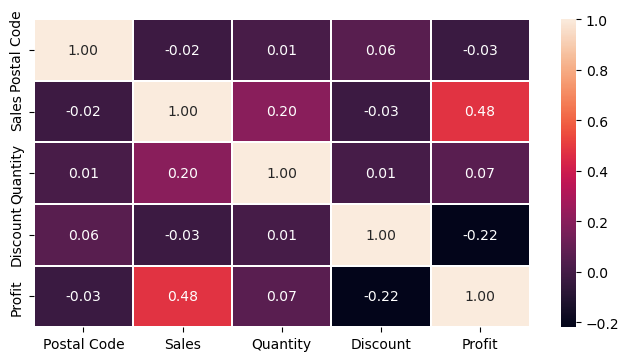

In [13]:
f,ax = plt.subplots(figsize=(8, 4))
sns.heatmap(new_df.corr(), annot=True, linewidths=.1, fmt= '.2f',ax=ax)
plt.show()

# The Outliers

Postal Code       Axes(0.125,0.867124;0.0129599x0.0128763)
Sales          Axes(0.140552,0.867124;0.0129599x0.0128763)
Quantity       Axes(0.156104,0.867124;0.0129599x0.0128763)
Discount       Axes(0.171656,0.867124;0.0129599x0.0128763)
Profit         Axes(0.187207,0.867124;0.0129599x0.0128763)
dtype: object

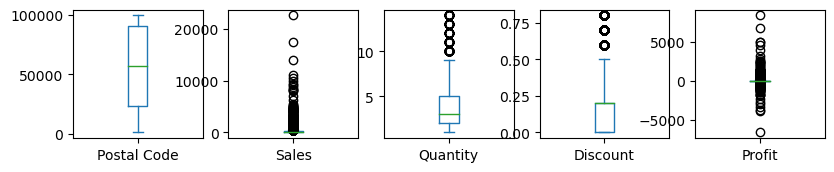

In [14]:
 new_df.plot(kind="box", subplots=True, figsize=(100,100), layout=(50,50))

In [15]:
df_numerics_only = new_df.select_dtypes(include=np.number)
df_numerics_only

,Postal Code,Sales,Quantity,Discount,Profit
0,42420,261.9600,2,0.00,41.9136
1,42420,731.9400,3,0.00,219.5820
2,90036,14.6200,2,0.00,6.8714
3,33311,957.5775,5,0.45,-383.0310
4,33311,22.3680,2,0.20,2.5164
...,...,...,...,...,...
9989,33180,25.2480,3,0.20,4.1028
9990,92627,91.9600,2,0.00,15.6332
9991,92627,258.5760,2,0.20,19.3932
9992,92627,29.6000,4,0.00,13.3200


In [16]:
# Removing the outliers

for col in df_numerics_only:
    q1 = new_df[col].quantile(0.25)
    q3 = new_df[col].quantile(0.75)
    iqr = q3-q1
    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)
    new_df2=df.loc[(new_df[col] <= upper_limit) & (new_df[col] >= lower_limit)]
print('before removing outliers:', len(new_df))
print('after removing outliers:',len(new_df2))
print('outliers:', len(new_df)-len(new_df2))

before removing outliers: 9994
after removing outliers: 8113
outliers: 1881


In [17]:
# Shape of the new data

print("number of Rows:", new_df2.shape[0])
print("number of Columns:", new_df2.shape[1])

number of Rows: 8113
number of Columns: 21


In [18]:
# show correlation between numerical colums after removing outliers

new_df2.corr()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Row ID,1.000000,0.014808,0.000187,-0.001408,0.014403,-0.014604
Postal Code,0.014808,1.000000,0.075585,0.027722,0.046284,0.001696
Sales,0.000187,0.075585,1.000000,0.162896,-0.037185,0.322309
Quantity,-0.001408,0.027722,0.162896,1.000000,0.008275,0.182883
Discount,0.014403,0.046284,-0.037185,0.008275,1.000000,-0.431420
Profit,-0.014604,0.001696,0.322309,0.182883,-0.431420,1.000000


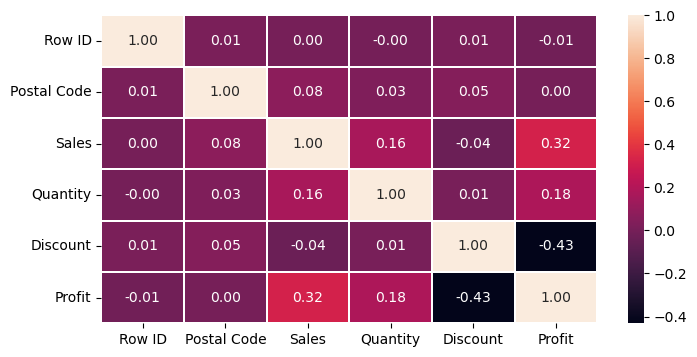

In [19]:
#correlation map after removing outliers
f,ax = plt.subplots(figsize=(8, 4))
sns.heatmap(new_df2.corr(), annot=True, linewidths=.1, fmt= '.2f',ax=ax)
plt.show()

# Visualizing The Data

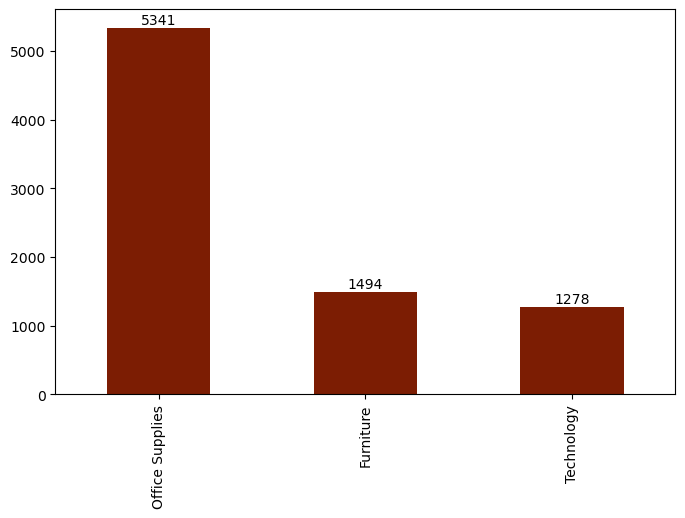

In [20]:
# show which Category has highest number
plt.figure(figsize=(8, 5))
new_df2['Category'].value_counts().plot(kind='bar', color='#7c1d03')

# print values on the bars
for i, v in enumerate(new_df2['Category'].value_counts()):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom')

plt.show()

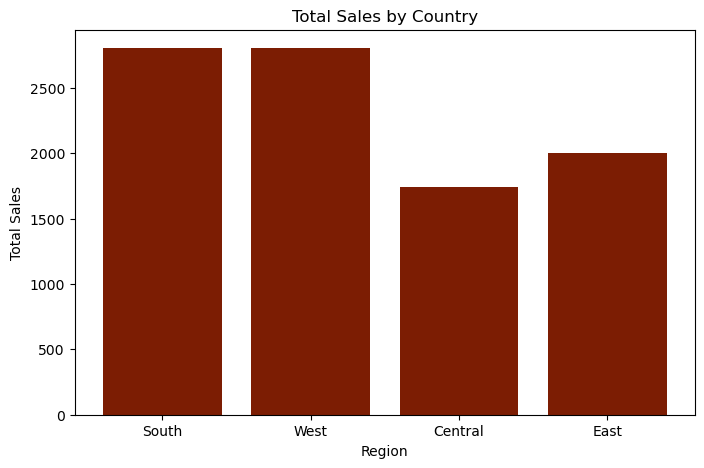

In [21]:
# show which Region has highest Sales
plt.figure(figsize=(8, 5))
plt.bar(new_df2['Region'], new_df2['Sales'], color='#7c1d03')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Country')
plt.show()

# Split the data 

In [22]:
from sklearn.model_selection import train_test_split

x = new_df2.drop('Profit', axis=1)  
y = new_df2['Profit']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
